In [ ]:
%%bash
pip install --no-cache-dir -qU pip wheel
pip install --no-cache-dir -qU numpy pandas matplotlib seaborn scikit-learn
pip install --no-cache-dir -qU tensorflow-gpu
pip check

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font="DejaVu Sans")

import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.get_logger().setLevel('ERROR')

In [3]:
class PlotHistory():
    plt_nrows = 1
    plt_ncols = 2
    plt_figsize = (15, 5)
    
    def __init__(self, history, metrics=['loss']):
        super().__init__()
        self.history = history
        self.metrics = metrics
        
    @classmethod
    def _create_plot(cls):
        return plt.subplots(nrows=cls.plt_nrows,
            ncols=cls.plt_ncols, figsize=cls.plt_figsize)
    
    def plot(self):
        df_history = pd.DataFrame(self.history.history,
            index=self.history.epoch)
        fig, axes = self._create_plot()
        for ax, metric in zip(axes, self.metrics):
            sns.lineplot(ax=ax, data=df_history, 
                x=df_history.index+1, y=metric, label='train')
            try:
                sns.lineplot(ax=ax, data=df_history, 
                    x=df_history.index+1, y=f'val_{metric}', label='valid')
            except Exception:
                pass
            ax.legend(loc='best')
            ax.set_xlabel('epoch')
            ax.set_ylabel(f'{metric}')
            ax.set_title(f'{metric} vs. epoch')
        fig.tight_layout()
        plt.show()

# Introduction to TensorFlow 2


## Coding tutorials

#### [1. Hello TensorFlow!](#coding_tutorial_1)

---
<a id='coding_tutorial_1'></a>
## Hello TensorFlow!

In [4]:
# Load MNIST dataset

print('Loading train data...\n')
data = np.loadtxt('./data/mnist/mnist.csv', delimiter=',')
print ('MNIST dataset loaded.\n')

x_train = data[:, 1:]
x_train = x_train / 255.
y_train = data[:, 0]

print('x train data size: {}'.format(x_train.shape))
print('y train data size: {}'.format(y_train.shape))

# Scale data to (0, 1)
print('Min: ', x_train.min())
print('Max: ', x_train.max())

Loading train data...

MNIST dataset loaded.

x train data size: (60000, 784)
y train data size: (60000,)
Min:  0.0
Max:  1.0


Training model...

Model trained successfully


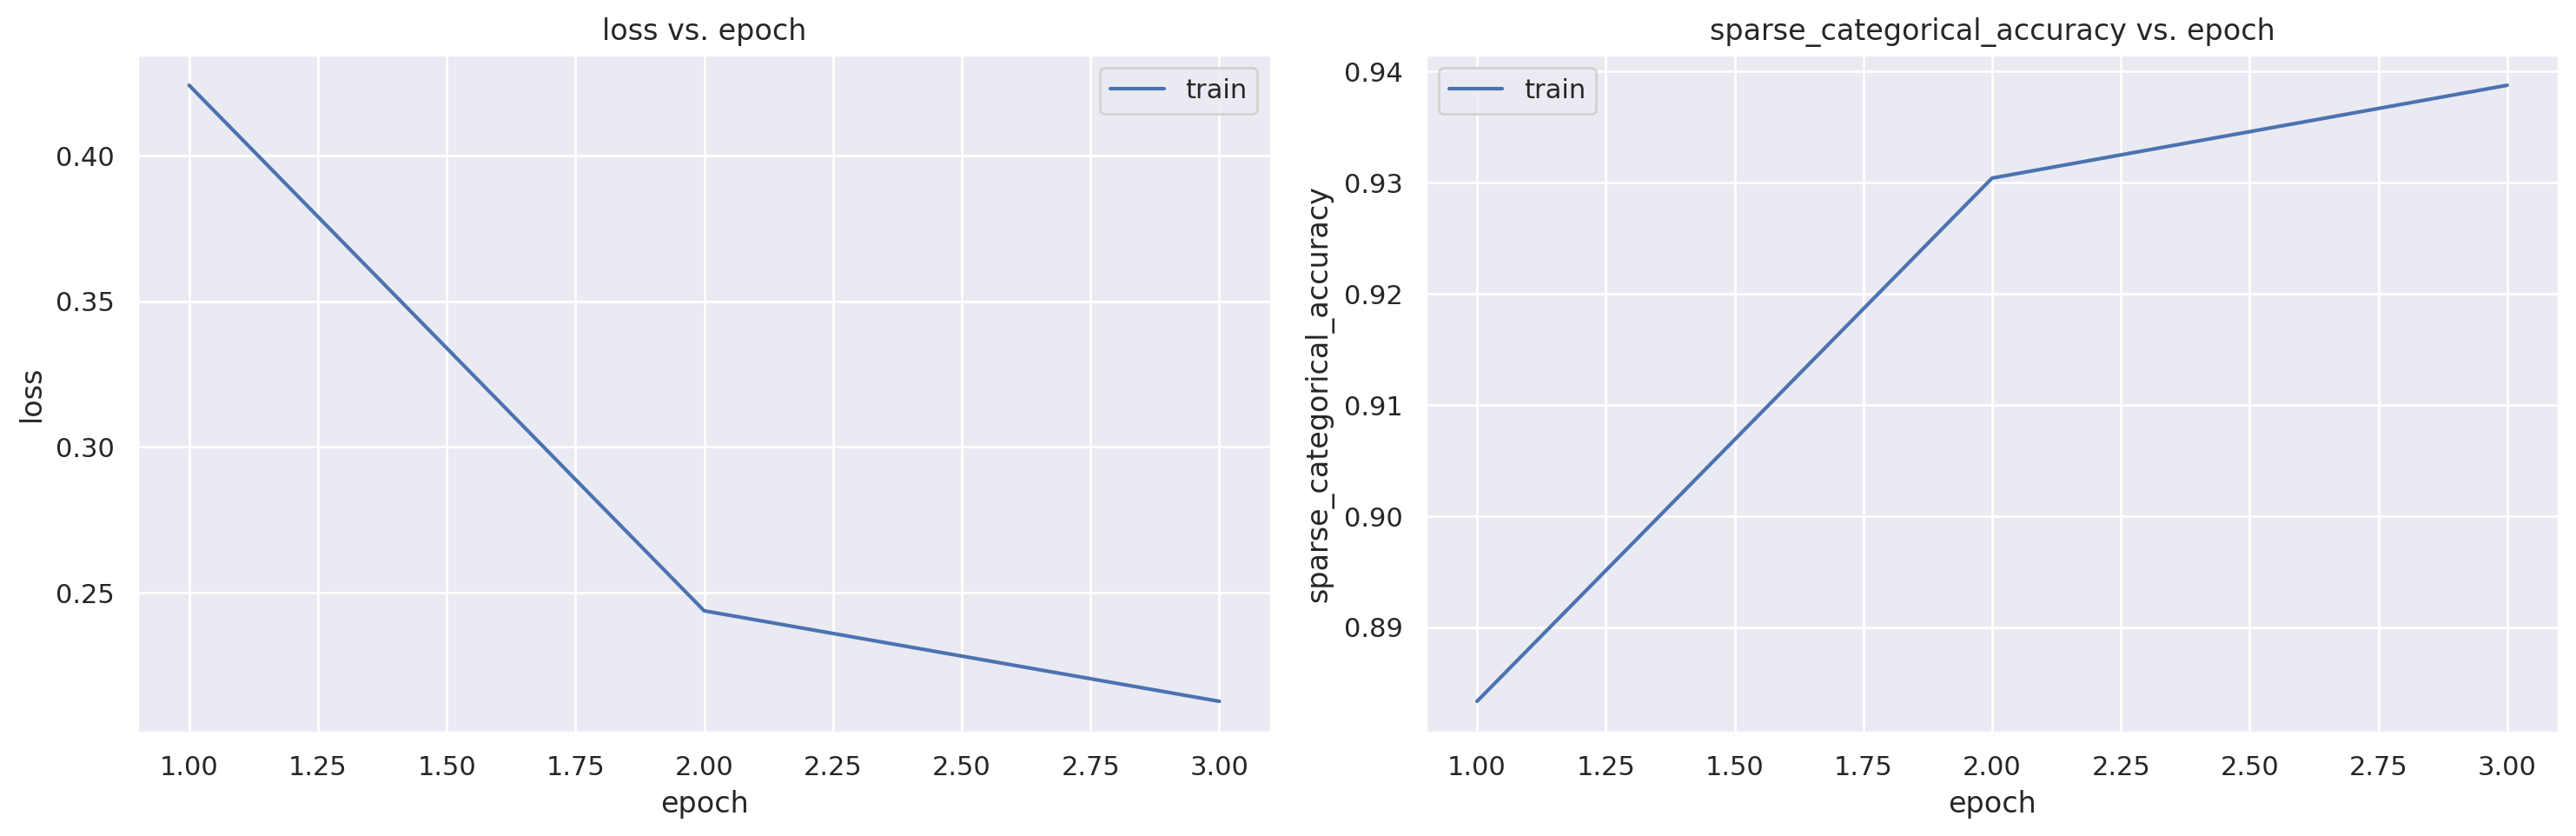

In [6]:
# Train a feedforward neural network for image classification

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

print('Training model...\n')
history = model.fit(x=x_train, y=y_train, 
    epochs=3, batch_size=32, verbose=0)
print('Model trained successfully')

PlotHistory(history, 
    metrics=['loss', 'sparse_categorical_accuracy'])\
    .plot()